In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import os
import cv2
import ast

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:

#! function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


#! function to calculate euclidean distance between two vectors

def euclidean_distance(vector1, vector2):
    try: 
        distance = 0.0
        for i in range(len(vector1)):
            distance += np.square(vector1[i] - vector2[i])
        distance = np.sqrt(distance)
        return distance
    except Exception as e:
        print("Error")
        print(e)
        # print(i,j)
        return 0

#! function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

In [3]:

# functions for file handling

def formatString(string):
    string = string.replace("array([", "[")
    string = string.replace("]),array([", "],[")
    string = string.replace("])", "]")
    return string


def convertToArray(string):
    listArr = ast.literal_eval(string)
    return listArr


def tupleToList(listArr):
    array = []
    for i in range(len(listArr)):
        array.append(listArr[i])
    return array

def loadFile(path):
    with open(path, 'r') as f:
        vector = f.read()
        vector = formatString(vector)
        vector = convertToArray(vector)
        vector = tupleToList(vector)
        f.close()
    return vector

        
def saveFile(path, vector):
    with open(path, 'w') as f:
        f.write(str(vector))
        f.close()

In [4]:
def accuracy(lengthTestVectors, lengthCorrectlyClassified):
    return (lengthCorrectlyClassified/lengthTestVectors)*100

def getDegreeOfMembership(distance, gamma):

    temp = gamma * distance

    if(temp > 1):
        return 0
    elif(temp == 0):
        return 1
    else:
        return 1-temp


def getMaximumMembership(test_vector, prototypes, gamma):
    maxDegree = getDegreeOfMembership(
        euclidean_distance(test_vector, prototypes[0]), gamma)
    index = 0

    for i in range(1, len(prototypes)):
        degree = getDegreeOfMembership(
            euclidean_distance(test_vector, prototypes[i]), gamma)
        if degree > maxDegree:
            maxDegree = degree
            index = i
    return index, maxDegree


def assignClass( actinic_keratosis_membership,  basal_cell_carcinoma_membership, dermatofibroma_membership, melanoma_membership, nevus_membership, pigmented_benign_keratosis_membership, seborrheic_keratosis_membership, squamous_cell_carcinoma_membership, vascular_lesion_membership):
    maximum = max(actinic_keratosis_membership, basal_cell_carcinoma_membership, dermatofibroma_membership, melanoma_membership, nevus_membership, pigmented_benign_keratosis_membership, seborrheic_keratosis_membership, squamous_cell_carcinoma_membership, vascular_lesion_membership)
    if maximum == actinic_keratosis_membership:
        return "actinic_keratosis"
    elif maximum == basal_cell_carcinoma_membership:
        return "basal_cell_carcinoma"
    elif maximum == dermatofibroma_membership:
        return "dermatofibroma"
    elif maximum == melanoma_membership:
        return "melanoma"
    elif maximum == nevus_membership:
        return "nevus"
    elif maximum == pigmented_benign_keratosis_membership:
        return "pigmented_benign_keratosis"
    elif maximum == seborrheic_keratosis_membership:
        return "seborrheic_keratosis"
    elif maximum == squamous_cell_carcinoma_membership:
        return "squamous_cell_carcinoma"
    elif maximum == vascular_lesion_membership:
        return "vascular_lesion"
    else:
        return "none"

In [5]:

# read the test vectors

actinic_keratosis_test_vectors = loadFile("../features/normalised/Test/normalised_actinic_keratosis_test_vectors.txt")
basal_cell_carcinoma_test_vectors = loadFile("../features/normalised/Test/normalised_basal_cell_carcinoma_test_vectors.txt")
dermatofibroma_test_vectors = loadFile("../features/normalised/Test/normalised_dermatofibroma_test_vectors.txt")
melanoma_test_vectors = loadFile("../features/normalised/Test/normalised_melanoma_test_vectors.txt")
nevus_test_vectors = loadFile("../features/normalised/Test/normalised_nevus_test_vectors.txt")
pigmented_benign_keratosis_test_vectors = loadFile("../features/normalised/Test/normalised_pigmented_benign_keratosis_test_vectors.txt")
seborrheic_keratosis_test_vectors = loadFile("../features/normalised/Test/normalised_seborrheic_keratosis_test_vectors.txt")
squamous_cell_carcinoma_test_vectors = loadFile("../features/normalised/Test/normalised_squamous_cell_carcinoma_test_vectors.txt")
vascular_lesion_test_vectors = loadFile("../features/normalised/Test/normalised_vascular_lesion_test_vectors.txt")

In [6]:
# read the prototypes

actinic_keratosis_prototypes = loadFile('../features/prototypes/actinic_keratosis_prototypes_0.008.txt')
basal_cell_carcinoma_prototypes = loadFile('../features/prototypes/basal_cell_carcinoma_prototypes_0.008.txt')
dermatofibroma_prototypes = loadFile('../features/prototypes/dermatofibroma_prototypes_0.008.txt')
melanoma_prototypes = loadFile('../features/prototypes/melanoma_prototypes_0.05.txt')
nevus_prototypes = loadFile('../features/prototypes/nevus_prototypes_0.05.txt')
pigmented_benign_keratosis_prototypes = loadFile('../features/prototypes/pigmented_benign_keratosis_prototypes_0.008.txt')
seborrheic_keratosis_prototypes = loadFile('../features/prototypes/seborrheic_keratosis_prototypes_0.05.txt')
squamous_cell_carcinoma_prototypes = loadFile('../features/prototypes/squamous_cell_carcinoma_prototypes_0.008.txt')
vascular_lesion_prototypes = loadFile('../features/prototypes/vascular_lesion_prototypes_0.008.txt')

In [ ]:

y_true = []
y_pred = []

# gamma = 0.5
gamma = 0.0005

actinic_keratosis_correctly_classified = 0
basal_cell_carcinoma_correctly_classified = 0
dermatofibroma_correctly_classified = 0
melanoma_correctly_classified = 0
nevus_correctly_classified = 0
pigmented_benign_keratosis_correctly_classified = 0
seborrheic_keratosis_correctly_classified = 0
squamous_cell_carcinoma_correctly_classified = 0
vascular_lesion_correctly_classified = 0

for test_vector in actinic_keratosis_test_vectors:
    y_true.append("actinic_keratosis")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "actinic_keratosis":
        actinic_keratosis_correctly_classified += 1

for test_vector in basal_cell_carcinoma_test_vectors:
    y_true.append("basal_cell_carcinoma")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "basal_cell_carcinoma":
        basal_cell_carcinoma_correctly_classified += 1

for test_vector in dermatofibroma_test_vectors:
    y_true.append("dermatofibroma")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "dermatofibroma":
        dermatofibroma_correctly_classified += 1

for test_vector in melanoma_test_vectors:
    y_true.append("melanoma")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "melanoma":
        melanoma_correctly_classified += 1

for test_vector in nevus_test_vectors:
    y_true.append("nevus")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "nevus":
        nevus_correctly_classified += 1

for test_vector in pigmented_benign_keratosis_test_vectors:
    y_true.append("pigmented_benign_keratosis")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "pigmented_benign_keratosis":
        pigmented_benign_keratosis_correctly_classified += 1

for test_vector in seborrheic_keratosis_test_vectors:
    y_true.append("seborrheic_keratosis")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "seborrheic_keratosis":
        seborrheic_keratosis_correctly_classified += 1

for test_vector in squamous_cell_carcinoma_test_vectors:
    y_true.append("squamous_cell_carcinoma")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "squamous_cell_carcinoma":
        squamous_cell_carcinoma_correctly_classified += 1

for test_vector in vascular_lesion_test_vectors:
    y_true.append("vascular_lesion")
    actinic_keratosis_index, actinic_keratosis_degree = getMaximumMembership(test_vector, actinic_keratosis_prototypes, gamma)
    basal_cell_carcinoma_index, basal_cell_carcinoma_degree = getMaximumMembership(test_vector, basal_cell_carcinoma_prototypes, gamma)
    dermatofibroma_index, dermatofibroma_degree = getMaximumMembership(test_vector, dermatofibroma_prototypes, gamma)
    melanoma_index, melanoma_degree = getMaximumMembership(test_vector, melanoma_prototypes, gamma)
    nevus_index, nevus_degree = getMaximumMembership(test_vector, nevus_prototypes, gamma)
    pigmented_benign_keratosis_index, pigmented_benign_keratosis_degree = getMaximumMembership(test_vector, pigmented_benign_keratosis_prototypes, gamma)
    seborrheic_keratosis_index, seborrheic_keratosis_degree = getMaximumMembership(test_vector, seborrheic_keratosis_prototypes, gamma)
    squamous_cell_carcinoma_index, squamous_cell_carcinoma_degree = getMaximumMembership(test_vector, squamous_cell_carcinoma_prototypes, gamma)
    vascular_lesion_index, vascular_lesion_degree = getMaximumMembership(test_vector, vascular_lesion_prototypes, gamma)
    assigned_class = assignClass(actinic_keratosis_degree, basal_cell_carcinoma_degree, dermatofibroma_degree, melanoma_degree, nevus_degree, pigmented_benign_keratosis_degree, seborrheic_keratosis_degree, squamous_cell_carcinoma_degree, vascular_lesion_degree)
    y_pred.append(assigned_class)
    if assigned_class == "vascular_lesion":
        vascular_lesion_correctly_classified += 1

In [14]:
actinic_keratosis_correctly_classified=  15
basal_cell_carcinoma_correctly_classified=  15 
dermatofibroma_correctly_classified=  14 
melanoma_correctly_classified=  15 
nevus_correctly_classified=  14 
pigmented_benign_keratosis_correctly_classified=  14 
seborrheic_keratosis_correctly_classified  =2 
squamous_cell_carcinoma_correctly_classified=  13 
vascular_lesion_correctly_classified=  3 

In [44]:
y_true= ['actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'seborrheic_keratosis', 'seborrheic_keratosis', 'seborrheic_keratosis', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'vascular_lesion', 'vascular_lesion', 'vascular_lesion']
y_pred= ['actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'squamous_cell_carcinoma', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'actinic_keratosis', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'pigmented_benign_keratosis', 'dermatofibroma', 'dermatofibroma', 'dermatofibroma', 'nevus', 'dermatofibroma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'squamous_cell_carcinoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'squamous_cell_carcinoma', 'nevus', 'nevus', 'nevus', 'nevus', 'pigmented_benign_keratosis', 'nevus', 'nevus', 'nevus', 'nevus', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'dermatofibroma', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'seborrheic_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'pigmented_benign_keratosis', 'seborrheic_keratosis', 'squamous_cell_carcinoma', 'seborrheic_keratosis', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'pigmented_benign_keratosis', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'vascular_lesion', 'squamous_cell_carcinoma', 'seborrheic_keratosis', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'squamous_cell_carcinoma', 'vascular_lesion', 'vascular_lesion', 'vascular_lesion']

In [45]:
print("actinic_keratosis_correctly_classified: ", actinic_keratosis_correctly_classified ,"/" ,len(actinic_keratosis_test_vectors ))
print("basal_cell_carcinoma_correctly_classified: ", basal_cell_carcinoma_correctly_classified ,"/" ,len(basal_cell_carcinoma_test_vectors ))
print("dermatofibroma_correctly_classified: ", dermatofibroma_correctly_classified ,"/" ,len(dermatofibroma_test_vectors ))
print("melanoma_correctly_classified: ", melanoma_correctly_classified ,"/" ,len(melanoma_test_vectors ))
print("nevus_correctly_classified: ", nevus_correctly_classified ,"/" ,len(nevus_test_vectors ))
print("pigmented_benign_keratosis_correctly_classified: ", pigmented_benign_keratosis_correctly_classified ,"/" ,len(pigmented_benign_keratosis_test_vectors ))
print("seborrheic_keratosis_correctly_classified: ", seborrheic_keratosis_correctly_classified ,"/" ,len(seborrheic_keratosis_test_vectors ))
print("squamous_cell_carcinoma_correctly_classified: ", squamous_cell_carcinoma_correctly_classified ,"/" ,len(squamous_cell_carcinoma_test_vectors ))
print("vascular_lesion_correctly_classified: ", vascular_lesion_correctly_classified ,"/" ,len(vascular_lesion_test_vectors ))


print("y_true: ", y_true)
print("y_pred: ", y_pred)

actinic_keratosis_correctly_classified:  15 / 16
basal_cell_carcinoma_correctly_classified:  15 / 16
dermatofibroma_correctly_classified:  14 / 16
melanoma_correctly_classified:  15 / 16
nevus_correctly_classified:  14 / 16
pigmented_benign_keratosis_correctly_classified:  14 / 16
seborrheic_keratosis_correctly_classified:  2 / 3
squamous_cell_carcinoma_correctly_classified:  13 / 16
vascular_lesion_correctly_classified:  3 / 3
y_true:  ['actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'actinic_keratosis', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal_cell_carcinoma', 'basal

In [46]:

totalTestImages = len(actinic_keratosis_test_vectors) + len(basal_cell_carcinoma_test_vectors) + len(dermatofibroma_test_vectors) + len(melanoma_test_vectors) + len(nevus_test_vectors) + len(pigmented_benign_keratosis_test_vectors) + len(seborrheic_keratosis_test_vectors) + len(squamous_cell_carcinoma_test_vectors) + len(vascular_lesion_test_vectors)
print("totalTestImages: ", totalTestImages)

totalCorrectlyClassified =  actinic_keratosis_correctly_classified + basal_cell_carcinoma_correctly_classified + dermatofibroma_correctly_classified + melanoma_correctly_classified + nevus_correctly_classified + pigmented_benign_keratosis_correctly_classified + seborrheic_keratosis_correctly_classified + squamous_cell_carcinoma_correctly_classified + vascular_lesion_correctly_classified
print("totalCorrectlyClassified: ", totalCorrectlyClassified)

accuracy = totalCorrectlyClassified / totalTestImages * 100
print("accuracy: ", accuracy)

totalTestImages:  118
totalCorrectlyClassified:  105
accuracy:  88.98305084745762


Confusion matrix


<AxesSubplot:>

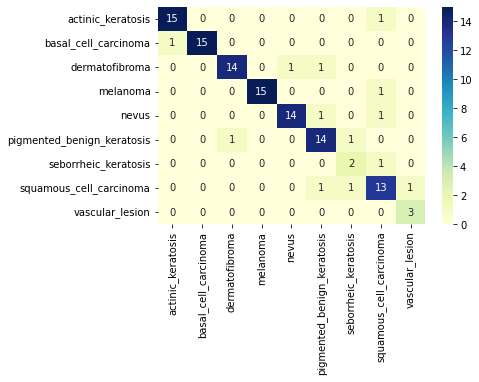

In [47]:
# get the confusion matrix with class labels

print("Confusion matrix")

labels = ["actinic_keratosis", "basal_cell_carcinoma", "dermatofibroma", "melanoma", "nevus", "pigmented_benign_keratosis", "seborrheic_keratosis", "squamous_cell_carcinoma", "vascular_lesion"]

cm = confusion_matrix(y_true, y_pred, labels=labels)

# plt.figure(figsize=(15, 12)) 

# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
# disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical', values_format='d', ax=plt.gca())
# plt.gcf().set_size_inches(12, 10) 


# disp.plot()
# plt.show()

sns.heatmap(cm, annot=True, cmap='YlGnBu', xticklabels=labels, yticklabels=labels, fmt='d')




In [48]:
# get the classification report
print(classification_report(y_true, y_pred))

                            precision    recall  f1-score   support

         actinic_keratosis       0.94      0.94      0.94        16
      basal_cell_carcinoma       1.00      0.94      0.97        16
            dermatofibroma       0.93      0.88      0.90        16
                  melanoma       1.00      0.94      0.97        16
                     nevus       0.93      0.88      0.90        16
pigmented_benign_keratosis       0.82      0.88      0.85        16
      seborrheic_keratosis       0.50      0.67      0.57         3
   squamous_cell_carcinoma       0.76      0.81      0.79        16
           vascular_lesion       0.75      1.00      0.86         3

                  accuracy                           0.89       118
                 macro avg       0.85      0.88      0.86       118
              weighted avg       0.90      0.89      0.89       118

